In [1]:
import random
import os
import torch
import torchaudio
import torch.nn.functional as F
import nbimporter
from torch.utils.data import Dataset, DataLoader
import pickle
import sys
import pandas

import torch.nn as nn
from torch import optim



In [2]:

import matplotlib.pyplot as plt
import pylab


In [3]:
#from classio import Io


In [4]:
from essentia import DebuggingModule
sys.path.append('../')

In [5]:
# Para una visualización más interactiva defino esta función que básicamente tiene todo lo que me gusta en cuanto a gráficas.

def set_default(figsize=(10, 10), dpi=100):
    plt.style.use([ 'dark_background','bmh'])
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=figsize, dpi=dpi)
    
    
    

In [6]:
# Definimos el tamaño de las gráficas
set_default(figsize=(16, 8))

In [7]:
f=open('/media/birds/BirdsDataFrame.pkl', 'rb')
df=pickle.load(f)
f.close()
df.head()

,index,Quality,ID,ClassID,Date,Time,Country,Locality,Latitude,Longitude,...,Family,Genus,Species,VernacularNames,FileName,BackgroundSpecies,CoincidenciaWavAlmacenados,sampling rate (kHz),No.Muestras,Duración (s)
0,1,1,34204,yyyyep,2002-07-31,10:30,Venezuela,"El Pauji road, Bolivar",4.6,-61.5,...,Thamnophilidae,Terenura,spodioptila,Ash-winged Antwren,LIFECLEF2017_BIRD_XC_WAV_RN34204.wav,0,1,44.1,825984,18.730
1,3,1,34206,xdfrru,2011-01-24,07:40,Ecuador,"El Para, east of Archidona, Napo",-0.952,-77.7314,...,Tyrannidae,Tolmomyias,viridiceps,Olive-faced Flatbill,LIFECLEF2017_BIRD_XC_WAV_RN34206.wav,0,1,48.0,3422592,71.304
2,13,1,34219,uegfkv,1991-02-12,0,Ecuador,"La Selva Lodge, Sucumbios/Napo",-0.4,-76.333,...,Rhinocryptidae,Liosceles,thoracicus,Rusty-belted Tapaculo,LIFECLEF2017_BIRD_XC_WAV_RN34219.wav,0,1,44.1,2020608,45.819
3,16,1,34223,flxiel,2003-04-00,0,Peru,"Loreto: 'Yavari Camp 2', ca. 80 km ESE of mout...",-4.9,-72.433,...,Galbulidae,Galbula,dea,Paradise Jacamar,LIFECLEF2017_BIRD_XC_WAV_RN34223.wav,0,1,44.1,2014848,45.688
4,18,1,34226,lwcfvq,2013-08-25,16:00,Brazil,"Patrocínio, Minas Gerais State",-18.9439,-46.9925,...,Hirundinidae,Alopochelidon,fucata,Tawny-headed Swallow,LIFECLEF2017_BIRD_XC_WAV_RN34226.wav,0,1,44.1,762624,17.293


In [8]:
len(df)

3277

In [9]:
especies=df['Species'].unique().tolist()
especies

['spodioptila',
 'viridiceps',
 'thoracicus',
 'dea',
 'fucata',
 'chalcopterus',
 'tectus',
 'mesochrysa',
 'diadema',
 'fulica',
 'melanoceps',
 'cinereum',
 'cayanus',
 'leucotis',
 'pyra',
 'castaneiventris',
 'oenone',
 'fumicolor',
 'fumigatus',
 'virescens',
 'deiroleucus',
 'superciliaris',
 'melanotis',
 'albigularis',
 'martii',
 'serranus',
 'nitidus',
 'caudata',
 'chilensis',
 'sordidus',
 'exilis',
 'bourcieri',
 'fusca',
 'antisianus',
 'obscurior',
 'littoralis',
 'virens',
 'duidae',
 'fulviventris',
 'humeralis',
 'isabellae',
 'tyrannina',
 'melanocephalus',
 'nigrogularis',
 'schisticolor',
 'alba',
 'niger',
 'nigricans',
 'surinamus',
 'xanthocephala',
 'margaritatus',
 'ochraceiceps',
 'maculatus',
 'aureoventris',
 'fuscicauda',
 'purusianus',
 'albirostris',
 'castanotis',
 'picta',
 'lafresnayi',
 'jamesoni',
 'devillei',
 'jacquacu',
 'plumbea',
 'rupicola',
 'platyrhynchum',
 'leucolaemus',
 'wyatti',
 'callophrys',
 'lacrymiger',
 'mexicanus',
 'carbonaria'

In [10]:
len(especies)

443

In [11]:
df["Species"].describe()

count            3277
unique            443
top       albigularis
freq               50
Name: Species, dtype: object

In [12]:
df['Country'].value_counts()

Ecuador          1516
Peru              664
Brazil            430
Venezuela         229
Colombia          214
Bolivia           100
Suriname           59
French Guiana      40
Uruguay             9
Paraguay            8
Guyana              8
Name: Country, dtype: int64

In [13]:
class Io:
    
        def __init__(self):
            pass
       
        
        def spectrogram(self,audio_path = None):
            waveform, sample_rate = torchaudio.load(audio_path)
           # print("Shape of waveform: {}".format(waveform.size()))
            #print("Sample rate of waveform: {}".format(sample_rate))

            # Plot de waveforms

            # plt.figure()
            # plt.plot(waveform.t().numpy())

            tensor = torchaudio.transforms.Spectrogram()(waveform) #many arguments to modificate the spectrogram 

          #  print("Shape of spectrogram: {}".format(tensor.size()))

            #plt.figure()
            #pylab.matshow(tensor.log2()[0,:,:].numpy(), cmap=pylab.get_cmap('plasma'))

            self.tensor = tensor





In [14]:
class AvesDataset:
    """Class of dataset"""
    especies=df['Species'].unique().tolist()

    def __init__(self, nPos=1, nNeg=1, winSize=50):
        self.nPos=nPos
        self.nNeg=nNeg
        self.winSize=winSize
        
        
   
    def pathRandSpectSam(self, path, winSize):
        io = Io()
        io.spectrogram(audio_path=path)
        spectogram = io.tensor
        startIdx = random.randint(0, spectogram.size()[2] - winSize)
        spectogram = spectogram[:, :, startIdx:startIdx+winSize]
        
        return spectogram[0].view(1,-1,50)


    def __len__(self):
        
        return 40
    
    def __getitem__(self,iterator):
        #iteration?
        pair=random.sample(especies,2)
        anchPosSpects = []
        negaSpects=[]
        anchPositive=df['FileName'][df['Species'] == pair[0]].to_list()
        negative=df['FileName'][df['Species'] == pair[1]].to_list()
        anchPosPaths=random.sample(anchPositive,self.nPos)
        negaPaths = random.sample(negative, self.nNeg)



        for path in anchPosPaths:
            path='/media/birds/data/'+path
            tempSpec = self.pathRandSpectSam(path, self.winSize)
            anchPosSpects.append(tempSpec)

        negaSpects = []

        for path in negaPaths:
            path='/media/birds/data/'+path
            tempSpec = self.pathRandSpectSam(path, self.winSize)
            negaSpects.append(tempSpec)

            print(tempSpec.shape)
            
        return { 
        'spectograms': {'positive': anchPosSpects,
                        'negative': negaSpects
                       },
        'labels': {'positive': 1,
                                   'negative': 0
                  }}
    

 

In [15]:
AvesData = AvesDataset()

In [16]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 3, 5)
        self.conv2 = nn.Conv2d(3, 5, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(2115, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        print(x.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x




In [17]:
#Modelo de red neuronal

class SiameseNetwork(nn.Module):
    
    def __init__(self, use_pretrained, feature_extracting, num_classes):
        super(SiameseNetwork, self).__init__()
        self.model_ft = Net()
        self.fc_mse = nn.Sequential(
            nn.Dropout(),
            nn.Linear(10 * 2, 2, bias = True),
            nn.ReLU(inplace = True),
            nn.Linear(2, 1, bias = True)
        )


    def forward_once(self, x):
        output = self.model_ft(x)
        return output.view(output.size(0), -1)

    def forward(self, input1, input2):
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)
        output = torch.cat((output1, output2), 1)
        output = self.fc_mse(output)
        return output

In [18]:


train_dataloader = DataLoader(AvesData,
                              shuffle = True,
                              num_workers = 2,
                              batch_size = 4)



In [19]:


net = SiameseNetwork(True, True, 512).cuda()
criterion = nn.MSELoss().cuda()
optimizer = optim.Adam(net.parameters(), lr = 1e-4)
net.train()



SiameseNetwork(
  (model_ft): Net(
    (conv1): Conv2d(1, 3, kernel_size=(5, 5), stride=(1, 1))
    (conv2): Conv2d(3, 5, kernel_size=(5, 5), stride=(1, 1))
    (fc1): Linear(in_features=2115, out_features=120, bias=True)
    (fc2): Linear(in_features=120, out_features=84, bias=True)
    (fc3): Linear(in_features=84, out_features=10, bias=True)
  )
  (fc_mse): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=20, out_features=2, bias=True)
    (2): ReLU(inplace=True)
    (3): Linear(in_features=2, out_features=1, bias=True)
  )
)

In [20]:
counter = []
loss_history = [] 
iteration_number = 0

In [23]:
#training
for epoch in range(0, 10):
    
    for i, data in enumerate(train_dataloader, 0):
        print(data)
        img1=data["spectograms"]["positive"][0]
        img0=data["spectograms"]["negative"][0]
        dif=data["labels"]["negative"]
        img0, img1, dif = img0.cuda(), img1.cuda(), dif.cuda()
        optimizer.zero_grad()
        output = net(img0, img1)
        loss = criterion(output, dif.float())
        loss.backward()
        optimizer.step()
    print("Epoch number {}\n Current loss {}\n".format(epoch, loss.item()))
    iteration_number += 1
    counter.append(iteration_number)
    loss_history.append(loss.item())

torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
{'spectograms': {'positive': [tensor([[[[2.4902e-03, 1.8347e-05, 2.7970e-03,  ..., 6.3983e-03,
           2.7324e-02, 8.0090e-03],
          [2.2334e-03, 1.2228e-03, 9.8874e-04,  ..., 5.7785e-04,
           1.1097e-02, 1.5240e-03],
          [1.0425e-03, 4.9290e-03, 2.0369e-03,  ..., 1.2009e-03,
           5.1378e-04, 1.0374e-03],
          ...,
          [3.4761e-04, 7.0327e-04, 1.4136e-03,  ..., 1.9081e-04,
           5.2678e-05, 1.6821e-04],
          [2.4607e-04, 1.1087e-03, 1.3682e-03,  ..., 4.0569e-04,
           3.5699e-05, 1.9382e-04],
          [1.7000e-06, 9.5392e-04, 4.5497e-04,  ..., 3.7832e-04,
           1.8777e-06, 3.8279e-04]]],


        [[[4.0178e-01, 4.2942e-01, 1.9187e-01,  ..., 8.1006e-01,
           2.6244e+00, 4.8890e+00],
          [6.3355e-02, 1.2991e-01, 8.0003e-0

/home/chica.rata/prueba/lib/python3.7/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
{'spectograms': {'positive': [tensor([[[[1.6347e+00, 8.2409e+00, 1.0543e+01,  ..., 3.2521e+00,
           6.3597e+00, 5.8375e-01],
          [5.1614e+00, 7.4549e+00, 4.4251e+00,  ..., 4.6579e+00,
           2.5596e+00, 4.9007e-01],
          [1.2370e+00, 1.4090e+00, 1.9789e-01,  ..., 8.7420e-01,
           9.4018e-02, 9.8613e-02],
          ...,
          [1.1747e-08, 2.5369e-08, 8.1797e-09,  ..., 6.1142e-09,
           1.4950e-08, 3.7587e-08],
          [1.4548e-08, 1.1235e-08, 1.1588e-08,  ..., 4.9474e-09,
           1.3059e-08, 2.9094e-08],
          [3.7180e-09, 2.5307e-09, 1.5341e-08,  ..., 5.6941e-09,
           1.8468e-10, 2.9141e-08]]],


        [[[7.4794e-01, 7.1047e-01, 2.2020e-02,  ..., 9.8127e-01,
           7.0727e-01, 3.9796e-01],
          [8.4003e+

torch.Size([1, 201, 50])
{'spectograms': {'positive': [tensor([[[[6.1734e-02, 1.4096e-02, 2.2076e-02,  ..., 2.6167e-03,
           4.2520e-01, 1.5091e-02],
          [1.1323e-01, 4.0117e-02, 1.1920e-01,  ..., 4.7114e-01,
           5.7239e-01, 6.2831e-02],
          [1.7862e-02, 1.4463e-01, 1.0936e-02,  ..., 5.4811e-01,
           1.7904e-01, 1.3282e-02],
          ...,
          [2.0642e-08, 5.4866e-09, 7.8588e-10,  ..., 9.0191e-10,
           7.9022e-09, 9.9016e-09],
          [2.3546e-09, 5.1198e-09, 3.0608e-09,  ..., 3.1706e-08,
           1.1688e-08, 7.8169e-10],
          [2.0061e-10, 9.6269e-09, 1.3027e-08,  ..., 5.9245e-08,
           3.1459e-09, 9.4074e-09]]],


        [[[2.6017e+01, 3.0016e+01, 2.7883e+01,  ..., 3.5227e+01,
           4.0587e+01, 3.2959e+01],
          [1.0188e+01, 7.2525e+00, 6.6499e+00,  ..., 9.3096e+00,
           1.0628e+01, 6.8183e+00],
          [2.8563e-01, 5.3157e-03, 1.9853e-02,  ..., 6.1703e-02,
           3.2762e-02, 2.3312e-02],
          ...,
  

torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
{'spectograms': {'positive': [tensor([[[[2.0295e-02, 1.3355e-03, 1.8519e-04,  ..., 1.0278e-05,
           1.6760e-05, 2.3584e-04],
          [9.2096e-03, 2.3798e-04, 3.6496e-04,  ..., 2.8478e-04,
           1.9136e-04, 7.6660e-05],
          [8.4279e-04, 4.4871e-04, 3.3263e-04,  ..., 3.7541e-04,
           5.3442e-04, 4.6099e-06],
          ...,
          [4.1808e-05, 1.4069e-05, 1.0605e-04,  ..., 1.8200e-05,
           2.2913e-05, 9.4731e-05],
          [2.5882e-05, 1.1272e-04, 1.7893e-04,  ..., 1.4944e-05,
           9.9321e-06, 5.2289e-05],
          [7.9236e-05, 1.7736e-04, 9.0490e-05,  ..., 1.2294e-04,
           1.9093e-07, 5.1936e-05]]],


        [[[5.0631e+00, 4.3875e+00, 3.7685e+00,  ..., 1.1629e-02,
           1.0262e+01, 2.0753e+00],
          [2.5391e+

torch.Size([1, 201, 50])
{'spectograms': {'positive': [tensor([[[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.1912e-03,
           2.0555e-04, 2.6809e-03],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.7658e-03,
           8.8566e-04, 1.0077e-02],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.3183e-02,
           1.2061e-02, 2.8021e-02],
          ...,
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.0827e-08,
           7.9179e-09, 7.2040e-11],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.0420e-08,
           1.9748e-09, 2.6525e-09],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 6.3034e-10,
           3.1104e-10, 3.6468e-09]]],


        [[[1.1289e+00, 3.8022e-01, 6.4274e-01,  ..., 6.0629e+00,
           5.8990e+00, 4.7156e+00],
          [1.7949e-01, 2.1348e-01, 3.4798e-01,  ..., 1.3210e+00,
           1.5634e+00, 8.4667e-01],
          [1.0566e-01, 1.7255e-01, 1.3156e-01,  ..., 4.6336e-01,
           2.7421e-03, 1.1832e-01],
          ...,
  

torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
{'spectograms': {'positive': [tensor([[[[9.8748e-01, 1.7856e-01, 1.6573e+00,  ..., 1.4505e+00,
           1.2559e-01, 8.0907e-01],
          [1.7027e+00, 1.6911e-02, 1.1647e+00,  ..., 1.5773e+00,
           7.0428e+00, 1.2573e+00],
          [7.1402e-01, 4.6369e-02, 1.5107e+00,  ..., 2.3522e-01,
           6.7873e+00, 3.8828e-01],
          ...,
          [1.0456e-08, 1.0089e-08, 1.9631e-08,  ..., 2.5730e-09,
           1.1441e-09, 6.9457e-09],
          [1.0582e-08, 7.3841e-10, 2.8751e-09,  ..., 8.3969e-09,
           8.3269e-09, 1.9154e-09],
          [2.4770e-08, 5.0840e-09, 4.1311e-10,  ..., 3.0398e-09,
           3.2097e-09, 1.9470e-08]]],


        [[[1.2198e-01, 7.1234e-02, 9.3512e-03,  ..., 2.5442e+00,
           3.9590e-01, 5.1209e-02],
          [2.6938e-

torch.Size([1, 201, 50])
{'spectograms': {'positive': [tensor([[[[1.8034e+00, 2.9452e-01, 1.4102e-02,  ..., 1.0938e+00,
           1.1497e+00, 4.2584e-01],
          [6.7426e-01, 4.2409e-01, 6.0074e-02,  ..., 3.9986e-01,
           8.7056e-01, 5.3533e-01],
          [5.6234e-01, 2.9939e-01, 1.1059e-01,  ..., 5.4143e-01,
           6.1767e-01, 5.0984e-01],
          ...,
          [6.3091e-10, 1.2050e-08, 6.4822e-09,  ..., 1.5812e-08,
           9.7590e-09, 1.3315e-08],
          [7.9855e-10, 1.9668e-08, 7.2221e-09,  ..., 3.5592e-08,
           3.2285e-09, 2.0727e-09],
          [3.1192e-09, 5.4363e-09, 1.6515e-09,  ..., 1.9073e-08,
           6.3983e-09, 1.6043e-09]]],


        [[[8.8589e-01, 1.3647e-01, 1.1834e+00,  ..., 1.4777e-02,
           6.5948e-02, 3.1026e-02],
          [4.3495e-01, 2.8689e-01, 4.9808e-01,  ..., 3.6272e-02,
           3.5898e-01, 1.2726e-01],
          [1.4706e-01, 6.2756e-02, 1.1833e-01,  ..., 6.9001e-03,
           6.6944e-01, 6.4587e-02],
          ...,
  

Epoch number 6
 Current loss 0.006648009642958641

torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
{'spectograms': {'positive': [tensor([[[[5.3777e-02, 2.2305e-01, 1.7941e-02,  ..., 2.8748e-01,
           1.2859e-01, 4.2014e-02],
          [1.0382e-02, 1.1308e-01, 2.2609e-03,  ..., 1.5682e-01,
           7.5707e-02, 2.5190e-04],
          [1.9732e-02, 2.3362e-02, 1.2926e-02,  ..., 2.4205e-02,
           1.8859e-03, 1.0788e-02],
          ...,
          [5.6522e-10, 1.5723e-09, 5.3736e-09,  ..., 3.4350e-08,
           2.9304e-09, 1.5075e-09],
          [1.0549e-08, 7.5285e-09, 1.9268e-09,  ..., 4.7282e-09,
           2.6147e-09, 3.5195e-09],
          [3.2633e-08, 9.9676e-13, 3.4899e-09,  ..., 1.3241e-09,
           6.7613e-10, 1.4097e-08]]],


        [[[1.9291e-08, 4.4697e-08, 2.9670e-09,  ..., 4.0204e-08,
           1.8130e-09, 2.9400

torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
{'spectograms': {'positive': [tensor([[[[1.7032e-09, 1.5178e-09, 1.3794e-10,  ..., 6.5142e-10,
           1.0471e-11, 3.7713e-10],
          [1.2339e-09, 4.6981e-09, 8.3970e-09,  ..., 8.9139e-11,
           1.2857e-08, 7.1823e-09],
          [4.4003e-09, 3.4155e-09, 6.1929e-10,  ..., 1.4244e-08,
           1.1348e-08, 3.6751e-08],
          ...,
          [1.3743e-08, 1.6187e-09, 8.2963e-09,  ..., 1.3272e-08,
           1.1724e-08, 1.2797e-08],
          [8.4017e-09, 2.4565e-09, 1.9245e-08,  ..., 1.0899e-09,
           3.3460e-08, 1.3812e-09],
          [2.4627e-09, 2.4447e-09, 1.4134e-08,  ..., 3.9286e-09,
           4.7689e-08, 1.6458e-08]]],


        [[[2.1385e-06, 3.8533e-06, 8.2218e-06,  ..., 8.2948e-07,
           1.9914e-06, 8.6857e-07],
          [3.6242e-06, 1.6735e-05, 1.5329e-05,  ..., 1.2593e-05,
           1.2106e-05, 4.8014e-06],
          [9.1752e-05, 1.6987e-04, 1.8296e-03,  ..., 9.6750e-04,
           2.5821e-04, 3.541

torch.Size([1, 201, 50])
torch.Size([1, 201, 50])
{'spectograms': {'positive': [tensor([[[[2.1178e-04, 1.2985e-04, 6.6397e-05,  ..., 1.4655e-03,
           2.1385e-04, 5.6139e-04],
          [5.8901e-04, 1.0200e-03, 4.2742e-04,  ..., 2.9629e-03,
           3.7110e-04, 8.2684e-04],
          [7.4970e-04, 4.1522e-03, 1.2154e-03,  ..., 7.5763e-03,
           1.4150e-03, 3.0490e-03],
          ...,
          [4.4255e-09, 6.2084e-09, 1.9921e-09,  ..., 3.1799e-09,
           9.7634e-09, 2.1370e-09],
          [4.8538e-09, 7.8367e-09, 4.4045e-11,  ..., 3.4828e-09,
           5.7367e-09, 5.8800e-09],
          [7.0185e-09, 2.6750e-10, 2.1196e-09,  ..., 3.5027e-09,
           6.6448e-09, 6.0739e-09]]],


        [[[3.3058e-07, 2.0220e-04, 7.3865e-04,  ..., 7.3353e-04,
           1.4199e-07, 3.9054e-05],
          [4.3597e-03, 1.5782e-02, 8.5307e-03,  ..., 6.9722e-03,
           3.4494e-03, 3.1478e-04],
          [4.7307e-02, 9.1637e-02, 7.7943e-03,  ..., 3.5067e-03,
           1.1924e-02, 1.645

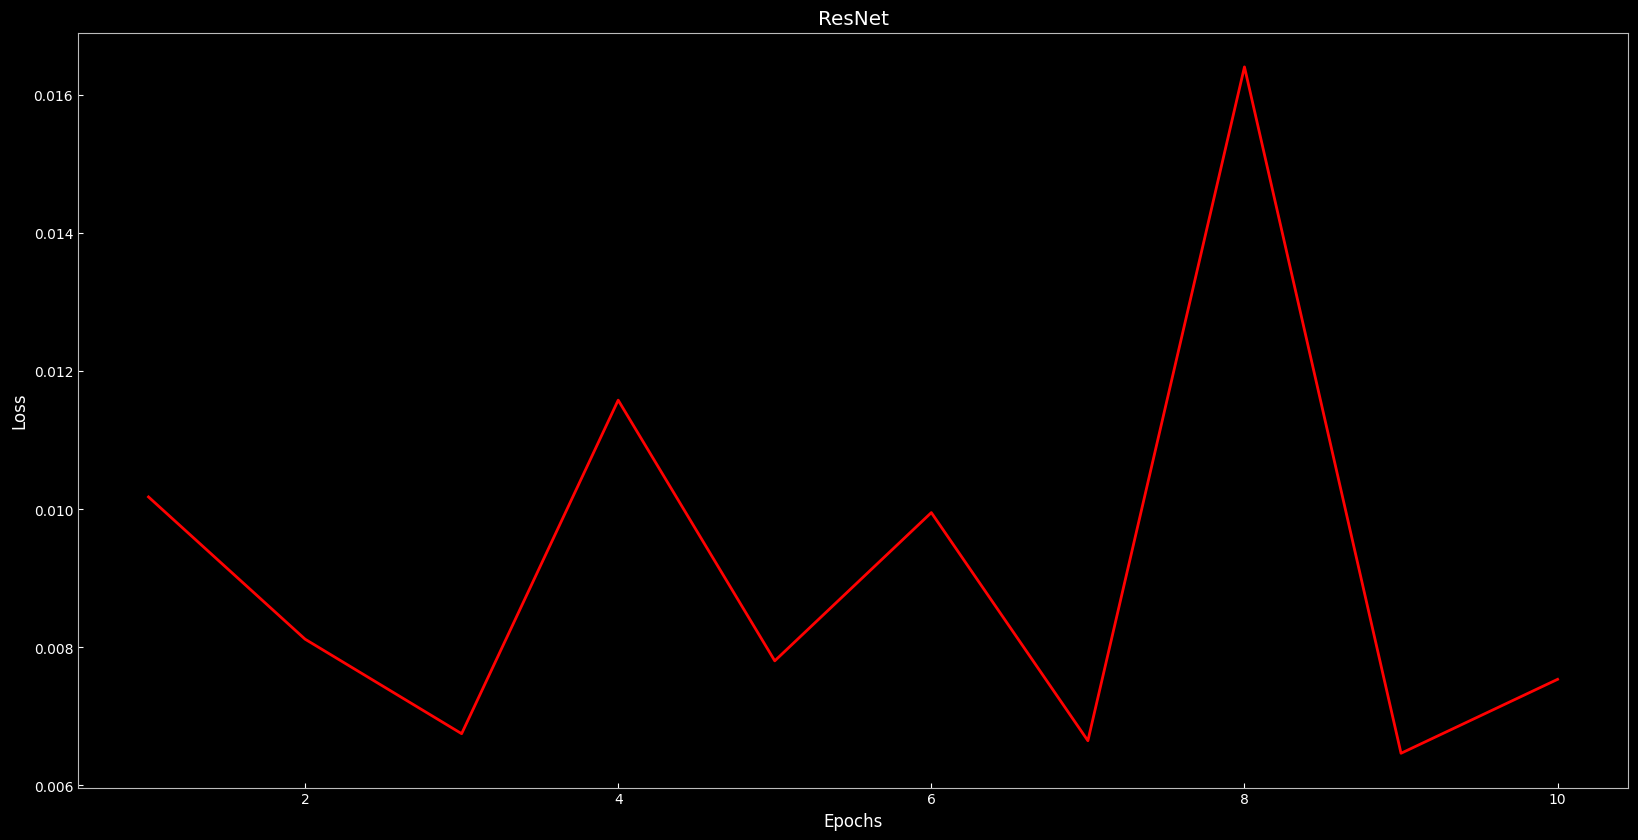

In [24]:
fig = plt.figure(figsize = (20, 10))
plt.plot(counter, loss_history, 'r')
plt.title('ResNet')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.rc('font', size = 15)
plt.grid()
plt.show()
